# TM10007 Assignment
Made by: Sifra Kuiper, Imme Spiekerman, Florien Algera and Nico Frijns

**Explanation of what this code will achieve**

This part of the code will connect this document to the github-location where the data is stored.

In [2]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git
!pip install fast_ml --upgrade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6

In [3]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/NFAFrijns/TM10007_G1_lipo.git

  Preparing metadata (setup.py) ... done


## Pre-processing

Data loading






In [4]:
## HET SPLITSEN VAN DATA IN TRAINING EN DATA GROEP

## PRE-PROCESSING FUNCTIE VAN NICO
## PRE-PROCCESSING FUNCTIE TOEGEPAST OP DE TRAINING DATA

# Data loading functions. Uncomment the one you want to use
from worclipo.load_data import load_data
import pandas as pd
data = load_data()

# Printing the demensions of the data
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

#splitting data into X and y
y  = data['label']
X = data[data.columns[1:]]
y = pd.DataFrame(y)
X = pd.DataFrame(X)
print(f'The number of samples: {len(X.index)}')
print(f'The number of samples: {len(y.index)}')
# Counting the different labels
def ratio_lipoma_liposarcoma(y):
  lipoma = 0
  liposarcoma = 0
  for i in y['label']:
    if i == "lipoma":
      lipoma += 1
    else:
      liposarcoma += 1
  return f'Ratio van lipoma and liposarcoma is: {lipoma} : {liposarcoma}'
print(ratio_lipoma_liposarcoma(y))




The number of samples: 115
The number of columns: 494
The number of samples: 115
The number of samples: 115
Ratio van lipoma and liposarcoma is: 57 : 58


Splitting data

In [5]:
from sklearn.model_selection import train_test_split
# making the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

print(f'Train {ratio_lipoma_liposarcoma(y_train)}')
print(f'Test {ratio_lipoma_liposarcoma(y_test)}')

Train Ratio van lipoma and liposarcoma is: 45 : 47
Test Ratio van lipoma and liposarcoma is: 12 : 11


Check for duplicates

In [6]:
# check of there are no duplicated features and rows by using the index
if  data.index.is_unique:
  print('Features and rows are unique by name')
else:
  print('There is a duplicated features and/or rows by name')

#check of there are no dupliceted features regarding the data
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features
print(f'The number of columns: {len(X_train.columns)}')
print(f'The number of columns: {len(X_test.columns)}')

duplicate_features = get_duplicate_features(X_train)
duplicate_features.head()
duplicate_features_list = duplicate_features.query(
    "Desc=='Duplicate Values'")['feature2'].to_list()
X_train.drop(columns = duplicate_features_list, inplace=True)
X_test.drop(columns = duplicate_features_list, inplace=True)
print(f'The number of columns: {len(X_train.columns)}')
print(f'The number of columns: {len(X_test.columns)}')

Features and rows are unique by name
The number of columns: 493
The number of columns: 493
The number of columns: 467
The number of columns: 467


Check for variance

In [7]:
from sklearn.feature_selection import VarianceThreshold

# Record the column names and data types
original_columns_train = X_train.columns
original_dtypes_train = X_train.dtypes
# Create an instance of VarianceThreshold
selector = VarianceThreshold()

# Fit the selector to your training data
selector.fit(X_train)

# Get the indices of the features that are kept after feature selection
kept_features_indices = selector.get_support(indices=True)

# Get the names of the kept features
kept_features_names = X_train.columns[kept_features_indices]

# Transform the training data and create a new DataFrame with the kept features
relevant_features_train = selector.transform(X_train)
X_selected_train = pd.DataFrame(relevant_features_train,
                                columns=kept_features_names,
                                index=X_train.index)
# setting features back to orginale datatype
for column in X_selected_train.columns:
  if column in original_columns_train:
    X_selected_train[column] = X_selected_train[column].astype(
        original_dtypes_train[column])
# Print the original DataFrame, transformed DataFrame,
# and the number of zero-variance features
print("\nNumber of zero-variance features:", X_train.shape[1] -
      X_selected_train.shape[1])

# Test data same transformation as train
original_columns_test = X_test.columns
original_dtypes_test = X_test.dtypes
relevant_features_test = selector.transform(X_test)
X_selected_test = pd.DataFrame(relevant_features_test,
                               columns=kept_features_names, index=X_test.index)
for column in X_selected_test.columns:
  if column in original_columns_test:
    X_selected_test[column] = X_selected_test[column].astype(
        original_dtypes_test[column])



Number of zero-variance features: 7


Data Checking Type

In [8]:
X_selected_train.info()
# want to have the name of the int to check if it is a catogirsed data
integer_features = X_selected_train.select_dtypes(include='int64').columns.tolist()
print("Integer features:")
print(integer_features)

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, Lipo-032_0 to Lipo-103_0
Columns: 460 entries, PREDICT_original_sf_compactness_avg_2.5D to PREDICT_original_phasef_phasesym_entropy_WL3_N5
dtypes: float64(441), int64(19)
memory usage: 331.3+ KB
Integer features:
['PREDICT_original_hf_peak_position', 'PREDICT_original_logf_peak_position_sigma1', 'PREDICT_original_logf_peak_position_sigma5', 'PREDICT_original_logf_peak_position_sigma10', 'PREDICT_original_tf_LBP_peak_position_R3_P12', 'PREDICT_original_tf_LBP_peak_position_R15_P36', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A0.0', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A0.79', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A1.57', 'PREDICT_original_tf_Gabor_peak_position_F0.05_A2.36', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A0.0', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A0.79', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A1.57', 'PREDICT_original_tf_Gabor_peak_position_F0.2_A2.36', 'PREDICT_original_tf_G

Want to make a plot of all the int data to see if it is categorized data is.

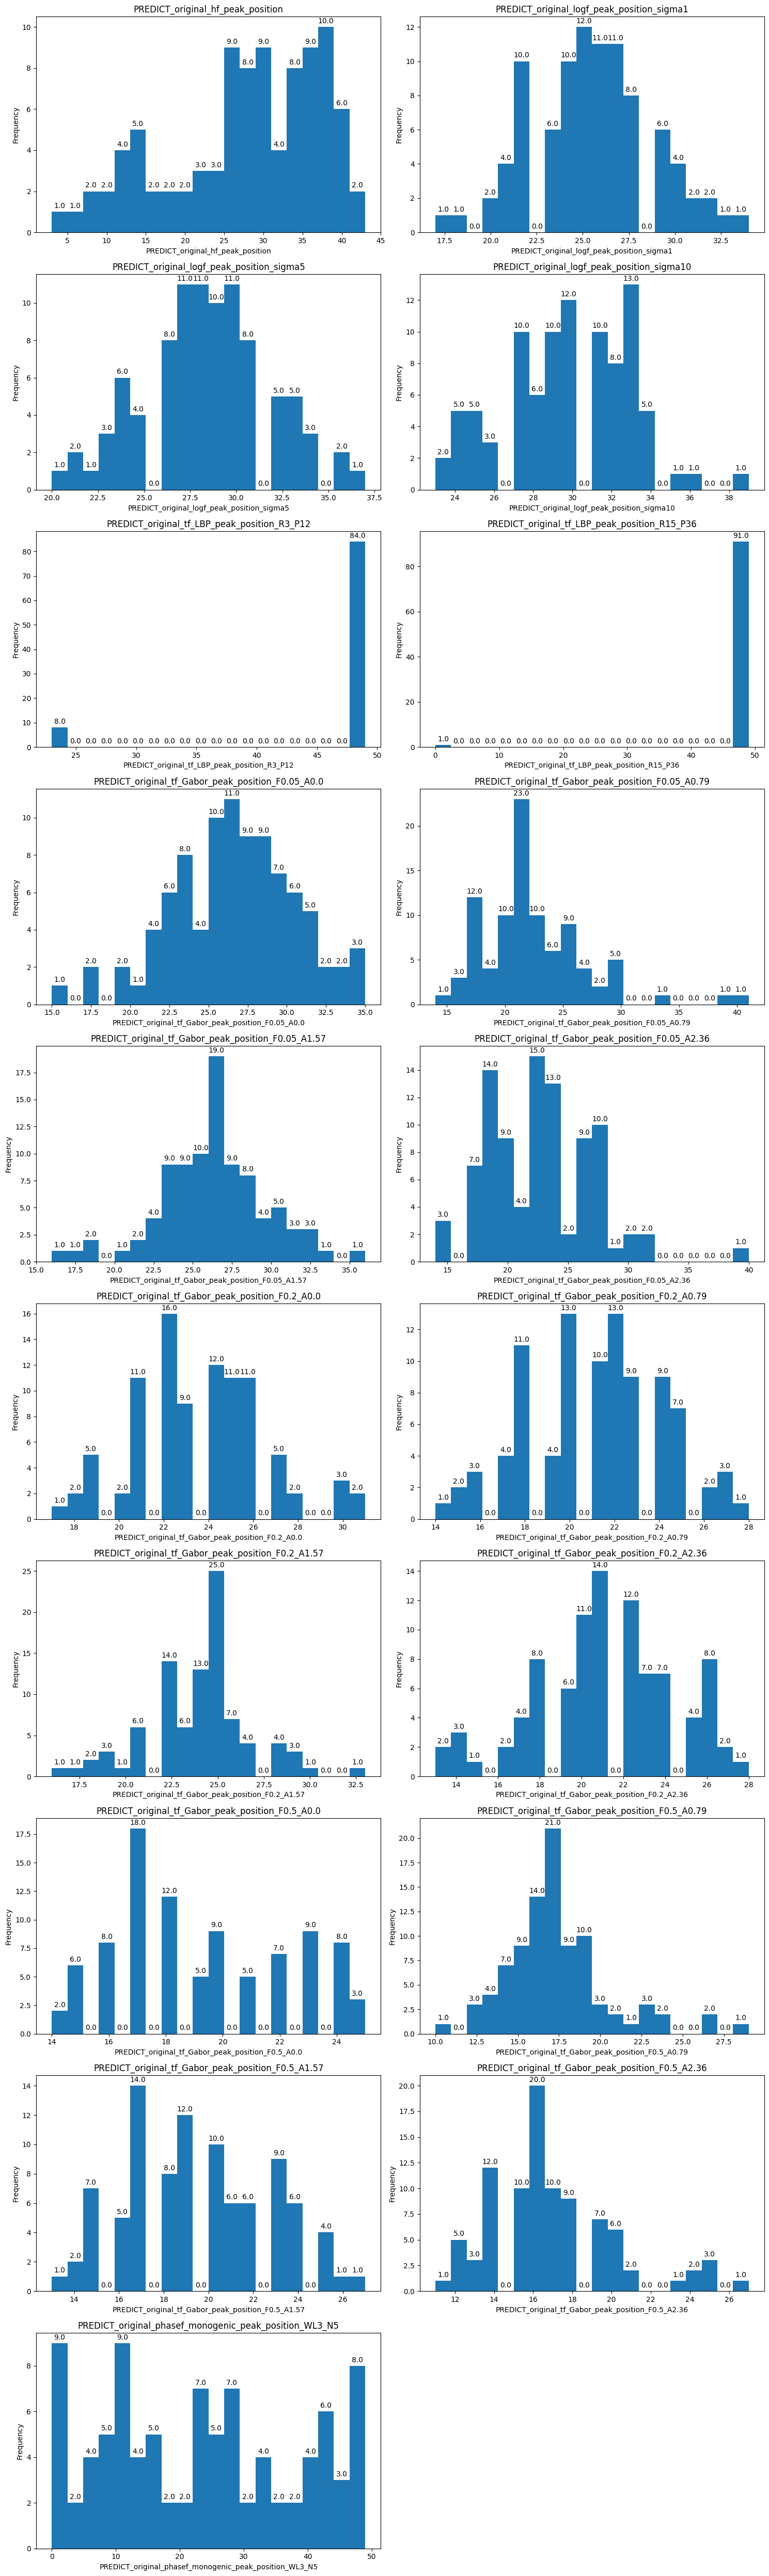

In [9]:
import matplotlib.pyplot as plt

# Assuming features_set is your set of features
num_features = len(integer_features)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_features // num_cols)  # Ceiling division to calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, feature in enumerate(integer_features):
    if feature in X_selected_train.columns:
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        X_selected_train[feature].plot(kind='hist', bins=20, ax=axes[row, col], title=feature)
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')
        # Annotate each bar with its count
        for rect in ax.patches:
            height = rect.get_height()
            ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom')

# Hide empty subplots if the number of features is not a multiple of num_cols
for i in range(num_features, num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

Check for outliers

In [10]:
Q1 = X_selected_train.quantile(0.25)
Q3 = X_selected_train.quantile(0.75)

# Calculate the IQR (Interquartile Range) for each column
IQR = Q3 - Q1

# Identify outliers using the IQR method
# Any value below Q1 - 1.5 * IQR
# or above Q3 + 1.5 * IQR is considered an outlier
outliers = ((X_selected_train < (Q1 - 1.5 * IQR)) |
 (X_selected_train > (Q3 + 1.5 * IQR))).sum().sum()

# Calculate the percentage of outliers
total_data_points = X_selected_train.size
total_percentage_outliers = (outliers / total_data_points) * 100

# Print the percentage of outliers for each column
print("Percentage of outliers:")
print(total_percentage_outliers)

Percentage of outliers:
4.881852551984877


Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_selected_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 columns=X_selected_train.columns,
                                 index=X_selected_train.index)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_selected_train)
X_test_scaled_df = pd.DataFrame(X_test_scaled,
                                columns=X_selected_train.columns,
                                index=X_selected_train.index)


Data naiming

In [12]:
X_train = X_train_scaled_df
X_test = X_test_scaled_df

## Choosing the right classifier

**Explanation of what is happening**


In [13]:
#import pandas as pd
#from worclipo.load_data import load_data
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

#Inladen data
#feature_data = load_data()
#X_train = feature_data.iloc[:, 2:]
#y_train = feature_data['label']

#Feature selection
numb_components = 70     # number of components
#x_scaled = StandardScaler().fit_transform(x_scaled) #DATA SCALING: voor nu even heel simple scaling, wachten op wat Nico doet voor echte voorbewerking
pca = PCA(n_components=numb_components) # Reduce from 4 to 3 features with PCA
pca_features = pca.fit_transform(X_train) # Fit and transform data
print('Original shape: ', X_train.shape) # Remake X_train with less components

y_train = y_train.values.ravel()

# 80% explained variance
pca80 = PCA(n_components=0.80)
X_train_PCA80 = pca80.fit_transform(X_train)
print('PCA80 shape: ', X_train_PCA80.shape)

# 90% explained variance
pca90 = PCA(n_components=0.90)
X_train_PCA90 = pca90.fit_transform(X_train)
print('PCA90 shape: ', X_train_PCA90.shape)

# 95% explained variance
pca95 = PCA(n_components=0.95)
X_train_PCA95 = pca95.fit_transform(X_train)
print('PCA95 shape: ', X_train_PCA95.shape)

classifiers = [
    (svm.SVC(kernel='linear', C=1.0, random_state=42), "LinSVM"),
    (svm.SVC(kernel="rbf", gamma=0.7, C=1.0), "rbfSVM"),
    (svm.SVC(kernel="poly", degree=2, gamma="auto", C=1.0), "polySVM"),
    (HistGradientBoostingClassifier(max_iter=100), "GBDT"),
    (KNeighborsClassifier(n_neighbors=5), "KNN"),
    (ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0), "RF"),
    (BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5), "Bagging meta-estimator"),
    (LogisticRegression(random_state=1), "LR"),
    (GaussianNB(), "NB")
]

results = {}
for clf, label in classifiers:
    # Scores berekenen voor PCA80
    scores_PCA80 = cross_val_score(clf, X_train_PCA80, y_train, cv=5)
    mean_accuracy_PCA80 = scores_PCA80.mean()
    std_dev_PCA80 = scores_PCA80.std()

    # Scores berekenen voor PCA90
    scores_PCA90 = cross_val_score(clf, X_train_PCA90, y_train, cv=5)
    mean_accuracy_PCA90 = scores_PCA90.mean()
    std_dev_PCA90 = scores_PCA90.std()

    # Scores berekenen voor PCA95
    scores_PCA95 = cross_val_score(clf, X_train_PCA95, y_train, cv=5)
    mean_accuracy_PCA95 = scores_PCA95.mean()
    std_dev_PCA95 = scores_PCA95.std()

    # Opslaan van resultaten
    results[label + ' (PCA 80%)'] = (mean_accuracy_PCA80, std_dev_PCA80)
    results[label + ' (PCA 90%)'] = (mean_accuracy_PCA90, std_dev_PCA90)
    results[label + ' (PCA 95%)'] = (mean_accuracy_PCA95, std_dev_PCA95)


Original shape:  (92, 460)
PCA80 shape:  (92, 17)
PCA90 shape:  (92, 30)
PCA95 shape:  (92, 43)


**Visualization of the performance of the different classifiers**

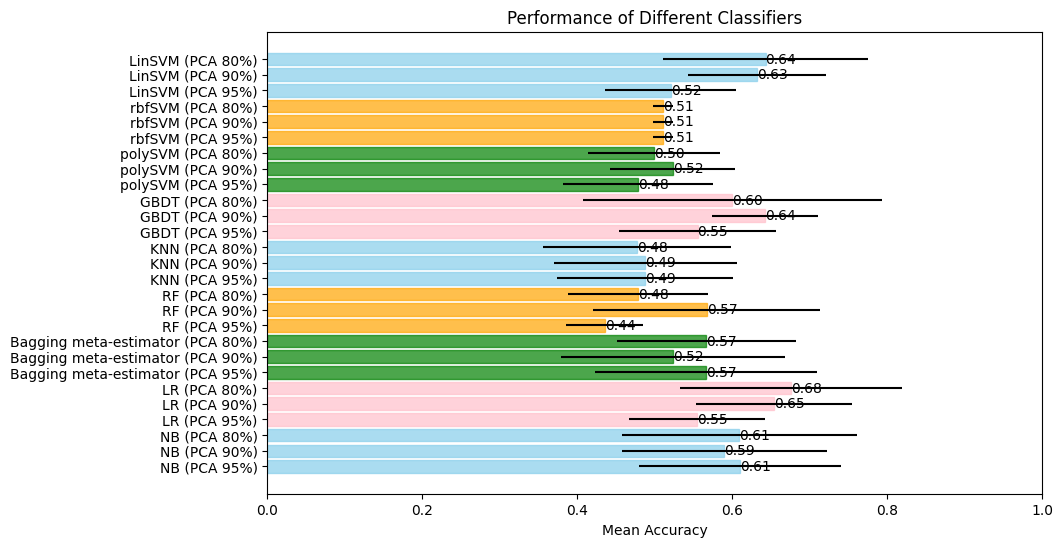

In [14]:
# Plot resultaten
labels = list(results.keys())
mean_accuracies = [result[0] for result in results.values()]
std_devs = [result[1] for result in results.values()]
colors = ['skyblue', 'skyblue', 'skyblue', 'orange', 'orange', 'orange', 'green', 'green', 'green', 'pink', 'pink', 'pink']

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, mean_accuracies, xerr=std_devs, edgecolor='black', alpha=0.7)

# Loop door elke balk en pas de kleur aan op basis van de index van de classifier in de lijst
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])  # Gebruik modulo om ervoor te zorgen dat kleuren worden hergebruikt indien nodig
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{mean_accuracies[i]:.2f}', va='center')

plt.xlabel('Mean Accuracy')
plt.title('Performance of Different Classifiers')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

## Optimalization of the GBDT classifier

**Explanation of code**

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define parameter grid for GBDT
param_distributions_gbdt = {
    'n_estimators': np.arange(50, 401, 50),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Define parameter grid for LinSVM
param_distributions_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

# Define parameter grid for LR
param_distributions_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [500, 1000, 1500]
}

# Perform optimization and training for PCA_80
classifiers = [(GradientBoostingClassifier(), param_distributions_gbdt, 'GBDT'),
               (SVC(), param_distributions_svm, 'LinSVM'),
               (LogisticRegression(), param_distributions_lr, 'LR')]

for clf, param_dist, label in classifiers:
    randomized_search = RandomizedSearchCV(clf, param_dist, cv=5, n_iter=20, random_state=42)
    randomized_search.fit(X_train_PCA80, y_train)
    print(f"Best Parameters for {label} (PCA_80):", randomized_search.best_params_)

# Perform optimization and training for PCA_90
for clf, param_dist, label in classifiers:
    randomized_search = RandomizedSearchCV(clf, param_dist, cv=5, n_iter=20, random_state=42)
    randomized_search.fit(X_train_PCA90, y_train)
    print(f"Best Parameters for {label} (PCA_90):", randomized_search.best_params_)



Best Parameters for GBDT (PCA_80): {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for LinSVM (PCA_80): {'kernel': 'linear', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for LR (PCA_80): {'solver': 'liblinear', 'max_iter': 500, 'C': 0.1}
Best Parameters for GBDT (PCA_90): {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for LinSVM (PCA_90): {'kernel': 'linear', 'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for LR (PCA_90): {'solver': 'liblinear', 'max_iter': 500, 'C': 1}


## Visualization of the performance of the trained classifier

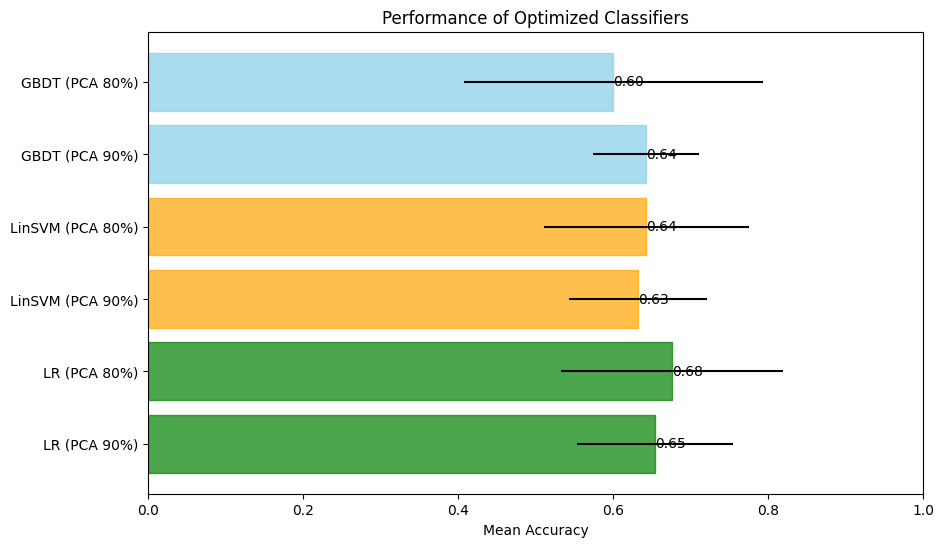

In [16]:
import matplotlib.pyplot as plt

# Get the mean accuracies and standard deviations of the optimized classifiers
optimized_classifiers = ['GBDT (PCA 80%)', 'GBDT (PCA 90%)', 'LinSVM (PCA 80%)', 'LinSVM (PCA 90%)', 'LR (PCA 80%)', 'LR (PCA 90%)']
mean_accuracies = [results[classifier][0] for classifier in optimized_classifiers]
std_devs = [results[classifier][1] for classifier in optimized_classifiers]

# Define colors for the bars
colors = ['skyblue', 'skyblue', 'orange', 'orange', 'green', 'green']

# Plot the mean accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(optimized_classifiers, mean_accuracies, xerr=std_devs, edgecolor='black', alpha=0.7)

# Loop through each bar and set its color based on the index of the classifier in the list
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])  # Use modulo to ensure colors are reused if necessary
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{mean_accuracies[i]:.2f}', va='center')

plt.xlabel('Mean Accuracy')
plt.title('Performance of Optimized Classifiers')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()



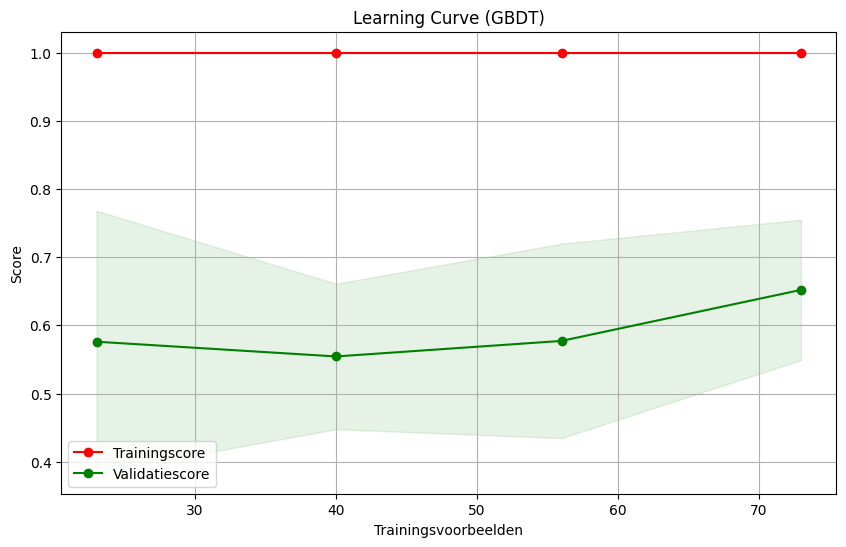

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


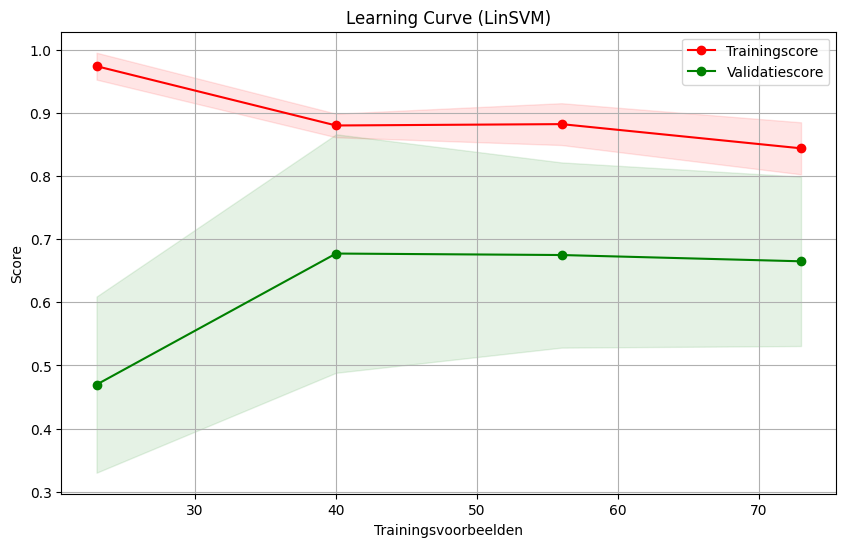

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


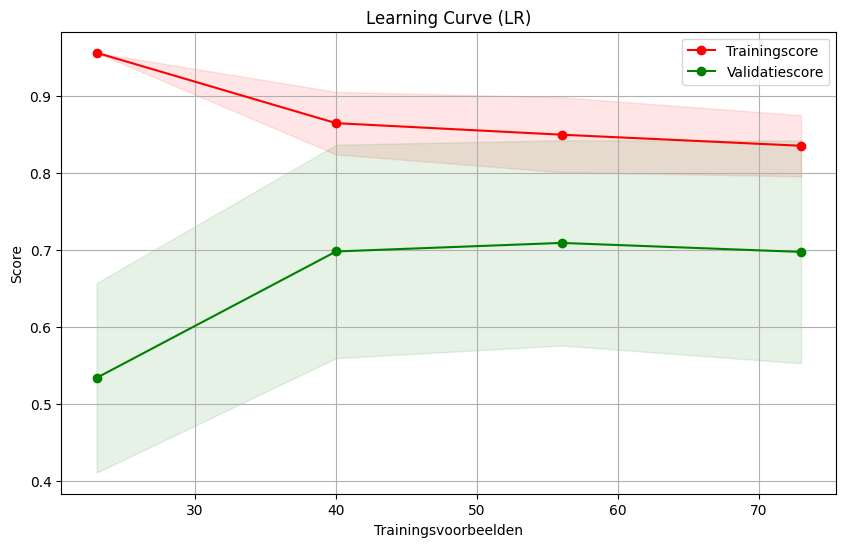

In [19]:
from sklearn.model_selection import learning_curve

# Definieer een functie om de leercurve te plotten
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=False)  # Verwijder `return_times=True` omdat we geen fit_times verwachten

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainingsvoorbeelden")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Trainingscore")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validatiescore")

    plt.legend(loc="best")
    return plt

# Plot leercurve voor elke classifier
for clf, params, label in classifiers:
    randomized_search = RandomizedSearchCV(clf, params, cv=5, n_iter=20, random_state=42)
    randomized_search.fit(X_train_PCA80, y_train)

    best_estimator = randomized_search.best_estimator_

    plot_learning_curve(best_estimator, f"Learning Curve ({label})", X_train_PCA80, y_train, cv=5)
    plt.show()

